In [235]:
from PIL import Image
from PIL import ImageFilter
import pytesseract

pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

import cv2

import pandas as pd, seaborn as sns
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
import numpy as np
import time
from IPython.display import Image as imgp
import smtplib

import matplotlib.pyplot as plt

import re

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

## prepare an image and "read" it

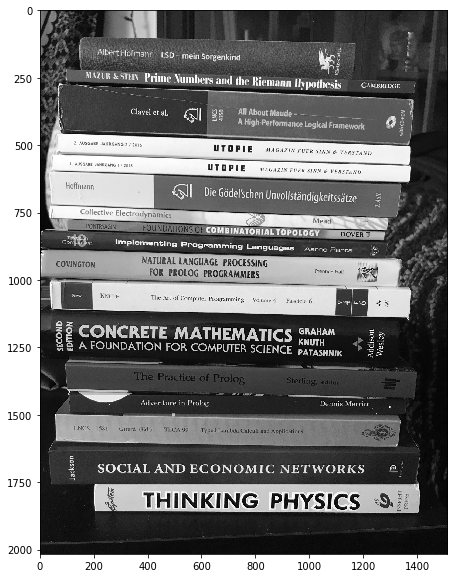

In [236]:
## read and pre-proccess an image 
file = './user_books/8/1.jpg'

# img = Image.open(file)
# sharp = img.filter(ImageFilter.SHARPEN)

gray_image = cv2.imread(file, 0)
# gray_image.filter(ImageFilter.SHARPEN)

plt.figure(figsize = (10,10))
plt.imshow(gray_image, cmap = plt.cm.gray)

In [237]:
# parse image text 
parsed = pytesseract.image_to_string(gray_image)
parsed_raw = parsed.split('\n')

print(pd.DataFrame((parsed_raw)))

                                                                        0
0                                                                , £1, ,1
1                                                                 x ‘J‘ t
2                                                      , I 7 Mai—7 ~ ~ .3
3                                                          , 3 _ V , g ‘-
4                      .. I I: , Albert Hofmann LSD — mein Sorgenkind 3 i
5                                                                   i t L
6                                                                  l \‘ E
7   ; I MAZER 8: STEIN Prime Numbers and the Riemann Hypothesis CAMBRIDGE
8                                                      ‘ -'* “:ik‘ .4 ‘ "
9                                                                Vi ‘ , E
10                            Clav e1 et a1. @l gg AllAboutMaude-‘—— 7- °
11                                                                       
12                               A HIg

In [238]:
## remove lines that don't have at least 4 letter blocks 
pattern = re.compile("[a-zA-Z]{4,}")
lines = [x if(pattern.search(x)) else "" for x in parsed_raw]

pd.DataFrame(lines)

,0
0,
1,
2,
3,
4,".. I I: , Albert Hofmann LSD — mein Sorgenkind 3 i"
5,
6,
7,; I MAZER 8: STEIN Prime Numbers and the Riemann Hypothesis CAMBRIDGE
8,
9,


In [239]:
# remove all empty entries
lines_final = [x for x in lines if x!=""]
lines_final

['.. I I: , Albert Hofmann LSD — mein Sorgenkind 3 i',
 '; I MAZER 8: STEIN Prime Numbers and the Riemann Hypothesis CAMBRIDGE',
 'Clav e1 et a1. @l gg AllAboutMaude-‘—— 7- °',
 'A HIgh~Performan¢e Logical Fiamework 0 5',
 "Il'l'llFlE",
 "ll'l'llFlE",
 'HH.\\/l\\ lllR \\I\\,\\ I." i/R5Ii\\ll',
 "{d COMIIIFATORi‘Al'TGFUiID‘G‘Vﬂt-m '",
 'Implementing Programming Languages Aame Par-ma I',
 'NATURAL LANGUAGE PROCESSING ”mm“',
 'FOR PROLOG PROGRAMMERS',
 'The ArI III Computer ngrmuming \\(IILIIIII‘ I F‘Iu‘idr h',
 '%§ CONCRETE MATHEMATICS GRAHAM',
 'KNUTH :3 g',
 'FOUNDATION FOR COMPUTER SCIENCE PATASHNIK 3? 3',
 'Adventure 111 Prolog Dcnms Mein t .',
 'LNCS 1581 Girard (Ed.) TLCA‘99 Typed Lambda.“',
 'Jackson']

## crawl Google + Amazon

In [240]:
#global item_id 
global items 
global url

In [241]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

In [242]:

## load chromedriver
path_to_chromedriver = './chromedriver' # change path as needed
driver = webdriver.Chrome(executable_path = path_to_chromedriver)


In [243]:

## Crawls an amazon url and extract inforamation about a book 

def amazon_crawl(source):
    
        item_id = len(items)
        items.append({})
      
        items[item_id]['url'] = s
        print("\t \t ---->> url")

        soup = BeautifulSoup(source, "lxml") 
        
        
        ## --- LANGUAGE 
        
        prod_details = soup.find('h2', string=re.compile("Product details")).find_next_sibling()
        items[item_id]['language'] = prod_details.find('b', string=re.compile("Language")).parent.text.strip("Language: ")
    
    
        ## --- DESCRIPTION
          
        # we get description only if the book is in English 
        if items[item_id]['language'] == 'English' :
            
            descr_raw = soup.find('noscript').find_next('noscript').text.strip()
            descr = cleanhtml(descr_raw).strip('\n').strip('\t').strip('\\').strip('&amp;')

            if(descr==''):
                descr_raw = soup.find('noscript').find_next('noscript').find_next('noscript').text.strip()
                descr = cleanhtml(descr_raw).strip('\n').strip('\t').strip('\\').strip('&amp;')

            items[item_id]['description'] = descr 
            print("\t \t ---->> description")
            
        else: 
            items[item_id]['description'] = ""
        
        ## --- filter out cases when book has no description
        if 'Your recently' in items[item_id]['description']: items[item_id]['description'] = ""
    
        try:
            ## --- IMAGE            
            try:
                image_url = soup.find("img", {"class": "frontImage"}).attrs['src']
          
            except:
        
                image = soup.find("div", {"id": "mainImageContainer"})
                image_url = image.find('img').attrs['src']

            if '.jpg' in image_url: 

                print(" *********** IMAGE ************** ")
                
                items[item_id]['img_url'] = image_url
                # save_path = 'images/'+item_id+'.jpg'
                save_path = 'images/'+str(item_id)+'.jpg'
                
                img_data = requests.get(image_url).content
                with open(save_path, 'wb') as handler:

                    handler.write(img_data)
                    items[item_id]['image'] = 'saved'
                    
            else: items[item_id]['image'] = 'none'
                
            print("\t \t ---->> image")   
            
        except: pass

        ## --- TITLE
        
        title_tag = soup.find("span", {"id": "productTitle"})
        title = title_tag.text

        items[item_id]['title'] = title
        print("\t \t ---->> title")
        
        ## --- AUTHOR
        
        span = soup.find("span", {"class": "author"})
        author = span.find('a').text

        items[item_id]['author'] = author 
        print("\t \t ---->> author")
        
        ## --- KEYWORDS
        items[item_id]['keywords'] = soup.find('meta', {'name': 'keywords'}).attrs['content']
        
        ## --- AMAZON TITLE / header
        
        items[item_id]['header'] = soup.find('meta', {'name': 'title'}).attrs['content']
        

        return(True)

    

In [244]:
# ### testing crawl html source 

# url = 'https://www.amazon.com/LSD-Sorgenkind-Entdeckung-einer-Wunderdroge/dp/3423361352'
# driver.get(url)
# soup = BeautifulSoup(driver.page_source , "lxml")

# soup;

# if(soup.find('meta', {'content': 'on'})): amazon_type = 1
# else: amazon_type = 2
    
# print(amazon_type)

# pd.set_option('display.max_colwidth', 1000)

# pd.Series(soup.findAll('meta'))

In [246]:

url_set = set()

###### **** MAIN CELL  --- do not delete this again! 


items = []
item_id = -1

for line in lines_final:

    found_book = False
    repeat = False
    ngrams = {}
    
    print(" ")
    print("_______________ ")
    print(" ")
    print(line)
    print("_______________ ")
    print(" ")
    
    while(True):

        print(">>>CYCLE START")

        google = "https://www.google.com/search?q="
        url = google+line

        driver.get(url)
        google_soup = BeautifulSoup(driver.page_source , "lxml")

        if google_soup.find('div', {'class': 'g'}) != None:     

            for cite in google_soup.findAll('cite'):  

                if(found_book): break

                ## OK. Google does not make it easy... had some strange a/href overwrites during a crawl; this is a workaround
                s = cite.find_parent().find_parent().find_parent().find_parent().find('a').get('href')

                #try:

                ### --- found AMAZON
                if s.find('https://www.amazon.com') == 0 and s.find('reviews') == -1 and s not in url_set:

                    driver.get(s)
                    soup = BeautifulSoup(driver.page_source, "lxml") 

                    try:
                        title = soup.find("meta", {'name': 'title'}).attrs['content']
                    except: title = ""
                    
                    if(title[-5:] == 'Books'):

                        print("amazon +")
                        print(s)
                        url_set.add(s)
                        found_book = amazon_crawl(driver.page_source)

                #except: pass  


            if(found_book == False): 
                print("\tNO AMAZON LINK FOUND...")

            ### ... now if we didn't find an amazon link in our search, 
            ### it is still possible that the book's title is mentioned in the results. 
            ### Here is a meat trick I devices to find that out: 
            
            ### ------------ GOOGLE search N-Grams Alanysis 
            
                # We will perform an N-gram analysis and compare the top Ngram frequency at 
                # each consecutive N(lengh) expantion to the previous one. If max(n) in max(n+1) then
                # we continue and once the most frequent n-gram changes, we stop. 
                # This happens to be an effective way of uncovering a full title of the book form search results
                # if it is present there.
                # then we feed that into search again and in most cases google will give us the amazon link to a book.
                  
            print("\tN-GRAMS...")

            corpus = ""

            for block in google_soup.findAll("span", {'class': 'st'}):
                corpus = corpus+block.text

            corpus = [corpus]    

            prev = {'ngram': 'none', 'match': -1}

            for i in np.arange(2,10):
                
                cv = CountVectorizer(ngram_range=(i,i), max_features=None)
                dtm = cv.fit_transform(corpus)    

                if(prev['ngram'] not in cv.get_feature_names()[dtm.argmax()] and prev['match'] == 1): break

                if(prev['ngram'] in cv.get_feature_names()[dtm.argmax()]): prev['match'] = 1
                else: prev['match'] = 0

                prev['ngram'] = cv.get_feature_names()[dtm.argmax()]
                prev['max'] = dtm.max()

            ngrams = prev
            
            if found_book == True or repeat == True: break
            
            ## now we will repeat the crawl loop with the new search line
            if prev['max']>3:

                repeat = True
                line = prev['ngram']
            
            else: break
        
        
        # if we made it to this line this means we have already found a book to save,
        # so we're breaking the loop to avoid looking through the rest of google results 
        # and hence getting duplicate entries
        else: break



 
_______________ 
 
.. I I: , Albert Hofmann LSD — mein Sorgenkind 3 i
_______________ 
 
>>>CYCLE START
amazon +
https://www.amazon.com/LSD-Sorgenkind-Entdeckung-einer-Wunderdroge/dp/3423361352
	 	 ---->> url
 *********** IMAGE ************** 
	 	 ---->> image
	 	 ---->> title
	 	 ---->> author
	N-GRAMS...
 
_______________ 
 
; I MAZER 8: STEIN Prime Numbers and the Riemann Hypothesis CAMBRIDGE
_______________ 
 
>>>CYCLE START
amazon +
https://www.amazon.com/Prime-Numbers-Riemann-Hypothesis-Barry/dp/1107499437
	 	 ---->> url
	 	 ---->> description
 *********** IMAGE ************** 
	 	 ---->> image
	 	 ---->> title
	 	 ---->> author
	N-GRAMS...
 
_______________ 
 
Clav e1 et a1. @l gg AllAboutMaude-‘—— 7- °
_______________ 
 
>>>CYCLE START
	NO AMAZON LINK FOUND...
	N-GRAMS...
 
_______________ 
 
A HIgh~Performan¢e Logical Fiamework 0 5
_______________ 
 
>>>CYCLE START
amazon +
https://www.amazon.com/All-About-Maude-High-Performance-Framework/dp/3540719407
	 	 ---->> url
	 	 ---

In [248]:
pd.DataFrame(items)

,author,description,header,image,img_url,keywords,language,title,url
0,Visit Amazon's Albert Hofmann Page,,LSD. Mein Sorgenkind. Die Entdeckung einer 'Wunderdroge'.: Albert Hofmann: 9783423361354: Amazon.com: Books,saved,"https://images-na.ssl-images-amazon.com/images/I/41Ze2tg9hML._SX303_BO1,204,203,200_.jpg","Albert Hofmann,LSD. Mein Sorgenkind. Die Entdeckung einer 'Wunderdroge'.,Dtv,3423361352",Germ,LSD. Mein Sorgenkind. Die Entdeckung einer 'Wunderdroge'.,https://www.amazon.com/LSD-Sorgenkind-Entdeckung-einer-Wunderdroge/dp/3423361352
1,Barry Mazur,"Prime numbers are beautiful, mysterious, and beguiling mathematical objects. The mathematician Bernhard Riemann made a celebrated conjecture about primes in 1859, the so-called Riemann Hypothesis, which remains to be one of the most important unsolved problems in mathematics. Through the deep insights of the authors, this book introduces primes and explains the Riemann Hypothesis. Students with minimal mathematical background and scholars alike will enjoy this comprehensive discussion of primes. The first part of the book will inspire the curiosity of a general reader with an accessible explanation of the key ideas. The exposition of these ideas is generously illuminated by computational graphics that exhibit the key concepts and phenomena in enticing detail. Readers with more mathematical experience will then go deeper into the structure of primes and see how the Riemann Hypothesis relates to Fourier analysis using the vocabulary of spectra. Readers with a strong mathematical bac...","Prime Numbers and the Riemann Hypothesis: Barry Mazur, William Stein: 9781107499430: Amazon.com: Books",saved,"https://images-na.ssl-images-amazon.com/images/I/51nUpbFS-3L._SX333_BO1,204,203,200_.jpg","Barry Mazur, William Stein,Prime Numbers and the Riemann Hypothesis,Cambridge University Press,1107499437,Number Theory,Numbers, Prime,Numbers, Prime.,Riemann hypothesis,Riemann hypothesis.,Applied mathematics,Discrete mathematics,History of mathematics,Mathematical foundations,Mathematics,Mathematics / Number Theory,Philosophy of mathematics,Science/Mathematics",English,Prime Numbers and the Riemann Hypothesis,https://www.amazon.com/Prime-Numbers-Riemann-Hypothesis-Barry/dp/1107499437
2,Manuel Clavel,"Maude is a language and system based on rewriting logic. In this comprehensive account, you’ll discover how Maude and its formal tool environment can be used in three mutually reinforcing ways: as a declarative programming language, as an executable formal specification language, and as a formal verification system. Examples used throughout the book illustrate key concepts, features, and the many practical uses of Maude.\n","All About Maude - A High-Performance Logical Framework: How to Specify, Program, and Verify Systems in Rewriting Logic (Lecture Notes in Computer Science): Manuel Clavel, Francisco Durán, Steven Eker, Patrick Lincoln, Narciso Martí-Oliet, José Meseguer, Carolyn Talcott: 9783540719403: Amazon.com: Books",saved,"https://images-na.ssl-images-amazon.com/images/I/51LSKM74FqL._SX327_BO1,204,203,200_.jpg","Manuel Clavel, Francisco Durán, Steven Eker, Patrick Lincoln, Narciso Martí-Oliet, José Meseguer, Carolyn Talcott,All About Maude - A High-Performance Logical Framework: How to Specify, Program, and Verify Systems in Rewriting Logic (Lecture Notes in Computer Science),Springer,3540719407,Programming - General,Computer science,Artificial intelligence,COMPUTERS / Intelligence (AI) & Semantics,COMPUTERS / Programming / General,COMPUTERS / Programming Languages / General,COMPUTERS / Software Development & Engineering / General,Compilers & interpreters,Computer Books: Languages,Computer Programming,Computer programming / software development,Computer programming / software engineering,Computers,Computers - Languages / Programming,Computers/Intelligence (AI) & Semantics,Computers/Programming Languages - General,Computing: Professional & Programming,Informatik, EDV / Programmiersprachen,Log

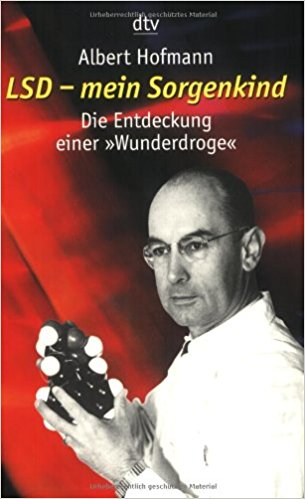

___________________________________________________
 
" LSD. Mein Sorgenkind. Die Entdeckung einer 'Wunderdroge'. "
___________________________________________________
 
author:  Visit Amazon's Albert Hofmann Page
 
url:  https://www.amazon.com/LSD-Sorgenkind-Entdeckung-einer-Wunderdroge/dp/3423361352
 
description: 



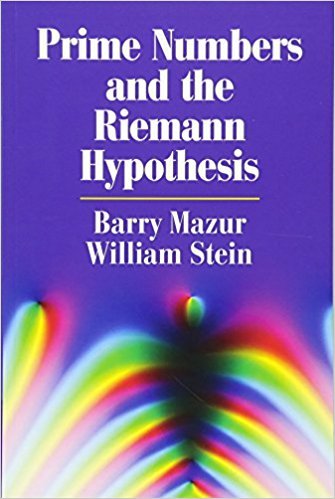

___________________________________________________
 
" Prime Numbers and the Riemann Hypothesis "
___________________________________________________
 
author:  Barry Mazur
 
url:  https://www.amazon.com/Prime-Numbers-Riemann-Hypothesis-Barry/dp/1107499437
 
description: 
 Prime numbers are beautiful, mysterious, and beguiling mathematical objects. The mathematician Bernhard Riemann made a celebrated conjecture about primes in 1859, the so-called Riemann Hypothesis, which remains to be one of the most important unsolved problems in mathematics. Through the deep insights of the authors, this book introduces primes and explains the Riemann Hypothesis. Students with minimal mathematical background and scholars alike will enjoy this comprehensive discussion of primes. The first part of the book will inspire the curiosity of a general reader with an accessible explanation of the key ideas. The exposition of these ideas is generously illuminated by computational graphics that exhibit the ke

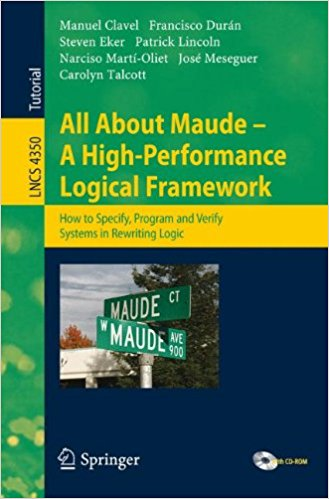

___________________________________________________
 
" All About Maude - A High-Performance Logical Framework: How to Specify, Program, and Verify Systems in Rewriting Logic (Lecture Notes in Computer Science) "
___________________________________________________
 
author:  Manuel Clavel
 
url:  https://www.amazon.com/All-About-Maude-High-Performance-Framework/dp/3540719407
 
description: 
 Maude is a language and system based on rewriting logic. In this comprehensive account, you’ll discover how Maude and its formal tool environment can be used in three mutually reinforcing ways: as a declarative programming language, as an executable formal specification language, and as a formal verification system. Examples used throughout the book illustrate key concepts, features, and the many practical uses of Maude.
 


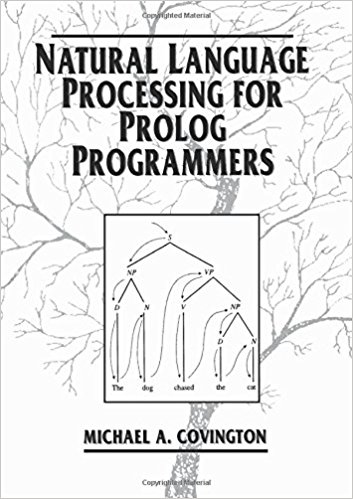

___________________________________________________
 
" Natural Language Processing for Prolog Programmers "
___________________________________________________
 
author:  Visit Amazon's Michael A. Covington Page
 
url:  https://www.amazon.com/Natural-Language-Processing-Prolog-Programmers/dp/0136292135
 
description: 
 An examination of natural language processing in Prolog for those who know Prolog but not linguistics, this book enables students to move quickly into writing and working in useful software. It features many working computer programs that implement subsystems of a natural language processor. These programs are designed to be understood in isolation from one another and are compatible with an Edinburgh-compatible Prolog implementation, such as Quintus, ESL, Arity and ALS.
 


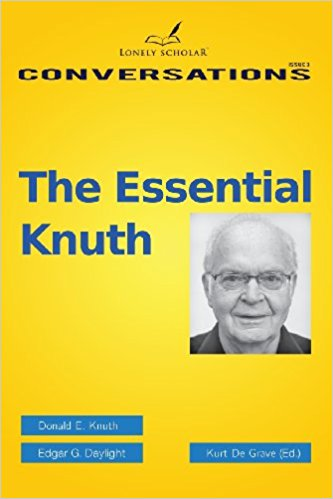

___________________________________________________
 
" The Essential Knuth "
___________________________________________________
 
author:  Donald E. Knuth
 
url:  https://www.amazon.com/Essential-Knuth-Donald/dp/9491386034
 
description: 
 Donald E. Knuth lived two separate lives in the late 1950s. During daylight he ran down the visible and respectable lane of mathematics. During nighttime, he trod the unpaved road of computer programming and compiler writing.   Both roads intersected! -- as Knuth discovered while reading Noam Chomsky's book Syntactic Structures on his honeymoon in 1961.  "Chomsky's theories fascinated me, because they were mathematical yet they could also be understood with my programmer's intuition. It was very curious because otherwise, as a mathematician, I was doing integrals or maybe was learning about Fermat's number theory, but I wasn't manipulating symbols the way I did when I was writing a compiler. With Chomsky, wow, I was actually doing mathematics and c

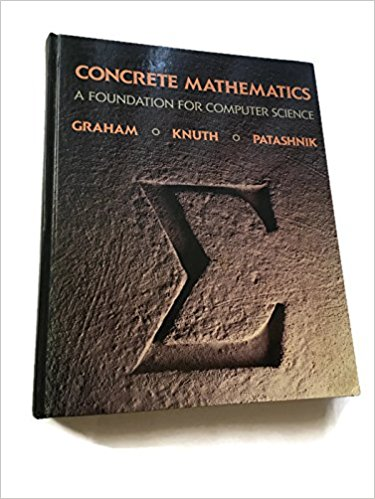

___________________________________________________
 
" Concrete Mathematics: A Foundation for Computer Science "
___________________________________________________
 
author:  Ronald L. Graham
 
url:  https://www.amazon.com/Concrete-Mathematics-Foundation-Computer-Science/dp/0201142368
 
description: 
 Will be shipped from US. Used books may not include companion materials, may have some shelf wear, may contain highlighting/notes, may not include CDs or access codes. 100% money back guarantee.
 


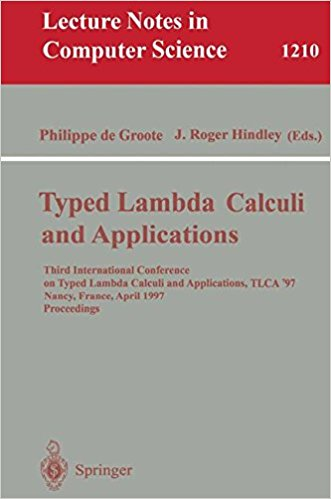

___________________________________________________
 
" Typed Lambda Calculi and Applications: Third International Conference on Typed Lambda Calculi and Applications, TLCA '97, Nancy, France, April 2-4, ... (Lecture Notes in Computer Science) "
___________________________________________________
 
author:  Philippe de Groote
 
url:  https://www.amazon.com/Typed-Lambda-Calculi-Applications-International/dp/3540626883
 
description: 
 This book constitutes the refereed proceedings of the Third International Conference on Typed Lambda Calculi and Applications, TLCA '97, held in Nancy, France, in April 1997.The 24 revised full papers presented in the book were carefully selected from a total of 54 submissions. The book reports the main research advances achieved in the area of typed lambda calculi since the predecessor conference, held in 1995, and competently reflects the state of the art in the area.
 


In [250]:


for i in np.arange(len(items)):

    display(imgp(filename='images/'+str(i)+'.jpg'))

    print("___________________________________________________")
    print(" ")
    print('\"',items[i]['title'],'\"')
    print("___________________________________________________")
    print(" ")
    print('author: ',items[i]['author'])
    print(" ")
    print("url: ",items[i]['url'])
    print(" ")
    print('description: ')
    print(items[i]['description'])

    
    
    

### Conclusion 

As you can see, we have correctly Identified 7 books out of an image containing 17, where only 1 was false positive ("The Essential Knuth"). 

This means a RECALL rate of 6/17 = 0.35

and a PRECISION of 6/7 = 0.85

In this project we mainly care about PRECESION, as the description of books we crawl will be the basis for setting up of our user profile and increasing precision has been my priority. 

Unfortunatelly due to the fact that showing how algorythm works requires live crawling, I could only showcase one example here, but on average this reflects the ratios I am getting on other images I have been testing on. 

### Stage 2: Comparing books and clustering them by themes (work in progress ..)

In [251]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# this is the actual data from what we've crawled 
# corpus = [x['description'] for x in items if x['description']]

In [253]:

## this is some texample test data:
## 3 entries are of books about programming 
## 3 entries are of books about AI 


corpus = [
    "This book is aimed at giving novice coders an understanding of the methods and techniques used in professional games development. Designed to help develop and strengthen problem solving and basic C/C++ skills, it also will help to develop familiarity targeting and using fixed/restricted hardware, which are key skills in console development. It allows the reader to increase their confidence as game programmers by walking them through increasingly involved game concepts, while maintaining the understanding that despite the increased complexity, the core methods remain consistent with the advancement of the technology; the technology only enhances the gaming experience. It also demonstrates underlying principles of game coding in practical step by step ways to increase exposure and confidence in game coding concepts.",
    "Unity is the most popular game engine among Indie developers, start-ups, and medium to large independent game development companies. This book is a complete exercise in game development covering environments, physics, sound, particles, and much more-to get you up and running with Unity rapidly.In this informal guide, you'll get to grips with the basics of game development, starting off with using C# for scripting. You'll get the hang of Unity's development environment and will be able to set up the required assets for your frst 2D game. You'll work on animating your player and getting it to move in the 2D environment. Next, you'll see how to build the game in 3D, making use of Unity's new 3D animation system. After building a beautiful 3D environment for the game, you'll work with the latest physics system that Unity has to offer and will make your assets interactive. You'll induce artifcial intelligence into the enemies and develop a mechanism to hit them with rocks and punches. Once you've made things pretty with the particle system, you'll move on to optimize the game, adding a cross-platform ready UI, and publishing your game across multiple platforms.You'll walk away with a cool 2D parallax side parallax game and an even cooler third-person 3D adventure game, but most importantly, with the confdence to build your own games.",
    "This book is for anyone who wants to learn computer programming and knows absolutely nothing about it. Of course, if you are wondering whether this book is going to teach you how to create amazing applets or incredible desktop or mobile applications, the answer is 'no'—that is a job for other books. So many books out there can teach you those skills in Python, C#, or Java. Many of them even claim that they can teach you in 24 hours! Don’t laugh! They probably can do that, but all of them take one thing for granted—that the reader knows some basics about computer programming. None of those books, unfortunately, bothers to teach you the first thing that a novice programmer needs to learn, which is 'Algorithmic Thinking.'Algorithmic Thinking involves more than just learning code. It is a problem solving process that involves learning how to code. With over 700 pages, and containing more than 300 solved and 400 unsolved exercises, over 450 true/false, 150 multiple choice, and 180 review questions (the solutions and the answers to which can be found on the Internet), this book is ideal for students, teachers, professors, novices or average programmers, or for anyone who wants to start learning or teaching computer programming using the proper conventions and techniques.",
    "Starred Review. Renowned inventor Kurzweil (The Age of Spiritual Machines) may be technology's most credibly hyperbolic optimist. Elsewhere he has argued that eliminating fat intake can prevent cancer; here, his quarry is the future of consciousness and intelligence. Humankind, it runs, is at the threshold of an epoch (the singularity, a reference to the theoretical limitlessness of exponential expansion) that will see the merging of our biology with the staggering achievements of GNR (genetics, nanotechnology and robotics) to create a species of unrecognizably high intelligence, durability, comprehension, memory and so on. The word 'unrecognizable' is not chosen lightly: wherever this is heading, it won't look like us. Kurzweil's argument is necessarily twofold: it's not enough to argue that there are virtually no constraints on our capacity; he must also convince readers that such developments are desirable. In essence, he conflates the wholesale transformation of the species with 'immortality,' for which read a repeal of human limit. In less capable hands, this phantasmagoria of speculative extrapolation, which incorporates a bewildering variety of charts, quotations, playful Socratic dialogues and sidebars, would be easier to dismiss. But Kurzweil is a true scientist—a large-minded one at that—and gives due space both to 'the panoply of existential risks' as he sees them and the many presumed lines of attack others might bring to bear. What's arresting isn't the degree to which Kurzweil's heady and bracing vision fails to convince—given the scope of his projections, that's inevitable—but the degree to which it seems downright plausible. (Sept.) ",
    "Superintelligence asks the questions: What happens when machines surpass humans in general intelligence? Will artificial agents save or destroy us? Nick Bostrom lays the foundation for understanding the future of humanity and intelligent life. The human brain has some capabilities that the brains of other animals lack. It is to these distinctive capabilities that our species owes its dominant position. If machine brains surpassed human brains in general intelligence, then this new superintelligence could become extremely powerful - possibly beyond our control. As the fate of the gorillas now depends more on humans than on the species itself, so would the fate of humankind depend on the actions of the machine superintelligence.But we have one advantage: we get to make the first move. Will it be possible to construct a seed Artificial Intelligence, to engineer initial conditions so as to make an intelligence explosion survivable? How could one achieve a controlled detonation? This profoundly ambitious and original book breaks down a vast track of difficult intellectual terrain. After an utterly engrossing journey that takes us to the frontiers of thinking about the human condition and the future of intelligent life, we find in Nick Bostrom's work nothing less than a reconceptualization of the essential task of our time.",
    "How will Artificial Intelligence affect crime, war, justice, jobs, society and our very sense of being human? The rise of AI has the potential to transform our future more than any other technology—and there’s nobody better qualified or situated to explore that future than Max Tegmark, an MIT professor who’s helped mainstream research on how to keep AI beneficial.How can we grow our prosperity through automation without leaving people lacking income or purpose? What career advice should we give today’s kids? How can we make future AI systems more robust, so that they do what we want without crashing, malfunctioning or getting hacked? Should we fear an arms race in lethal autonomous weapons? Will machines eventually outsmart us at all tasks, replacing humans on the job market and perhaps altogether? Will AI help life flourish like never before or give us more power than we can handle? What sort of future do you want? This book empowers you to join what may be the most important conversation of our time. It doesn’t shy away from the full range of viewpoints or from the most controversial issues—from superintelligence to meaning, consciousness and the ultimate physical limits on life in the cosmos."
]



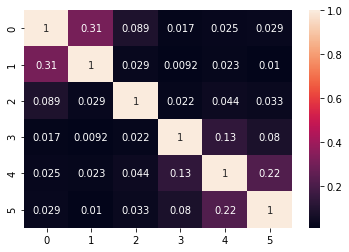

In [254]:

# stopwords
stop_file = ('./imports/stop_words_atire_puurula.txt')

stopwords = set(line.strip() for line in open(stop_file))

cv = CountVectorizer(ngram_range=(1,1), stop_words=stopwords)
cv.fit(corpus)
dtm = cv.transform(corpus) ## document term matrix 

vectors = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names())

cosine_similarity(vectors, vectors)

item_user_sim = pd.DataFrame( 
    cosine_similarity(vectors, vectors), 
    index   = vectors.index, 
    columns = vectors.index 
    )

sns.heatmap(item_user_sim, annot=True)

#### We can clearly see on a heatmap that our two cluster of books are correlated (0,1,2 and 3,4,5)

In [255]:
# [x['title'] for x in items if x['desription']]

In [256]:
# [x['desription'] for x in items if x['desription']]

## Stage 3: Matchmaking users  (in progress... )